In [3]:
import pandas as pd
import numpy as np 
import os 
# cannot download dataset as it is 4GB of data 
# so that is why shifted to kaggle 
# uploading the preprocessed dataset from kaggle 

In [4]:
data = pd.read_csv('final_dataset.csv')
data.head()

,patient_id,start_time,end_time,features,label
0,168,0.036,2.436,"[-576.7525024414062, 94.38788604736328, 63.836...",neither
1,168,2.436,5.250,"[-568.9930419921875, 99.15690612792969, 66.334...",neither
2,168,5.250,8.422,"[-584.05224609375, 99.47228240966797, 65.20143...",neither
3,168,8.422,11.222,"[-606.6028442382812, 118.7447509765625, 68.764...",neither
4,168,11.222,13.807,"[-591.5297241210938, 115.76345825195312, 70.81...",neither


In [5]:
data['label'].value_counts()

label
neither    3642
crackle    1864
wheeze      886
both        506
Name: count, dtype: int64

# CNN 70%

In [6]:
# more of neither lables so dataset is unbalanced 
# first training the CNN without smote 
# later to imporve accuracy will use SMOTE 

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models

X = np.array(data['features'].apply(lambda x: np.fromstring(x.strip('[]'), sep=',').astype(float)).tolist())
y = data['label'].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

model = models.Sequential([
    layers.Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(128, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes: neither, crackle, wheeze, both
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


Epoch 1/200


C:\Users\madir\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4415 - loss: 2.3634 - val_accuracy: 0.5471 - val_loss: 1.1036
Epoch 2/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5058 - loss: 1.1726 - val_accuracy: 0.5732 - val_loss: 1.0654
Epoch 3/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5288 - loss: 1.1167 - val_accuracy: 0.5609 - val_loss: 1.0676
Epoch 4/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5515 - loss: 1.0703 - val_accuracy: 0.5384 - val_loss: 1.0949
Epoch 5/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5548 - loss: 1.0513 - val_accuracy: 0.5536 - val_loss: 1.0495
Epoch 6/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5380 - loss: 1.0717 - val_accuracy: 0.5486 - val_loss: 1.0844
Epoch 7/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5505 - loss: 1.0478 - val_accuracy: 0.5384 - val_loss: 1.0789
Epoch 8/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5393 - loss: 1.0512 - val_accuracy: 0.5377

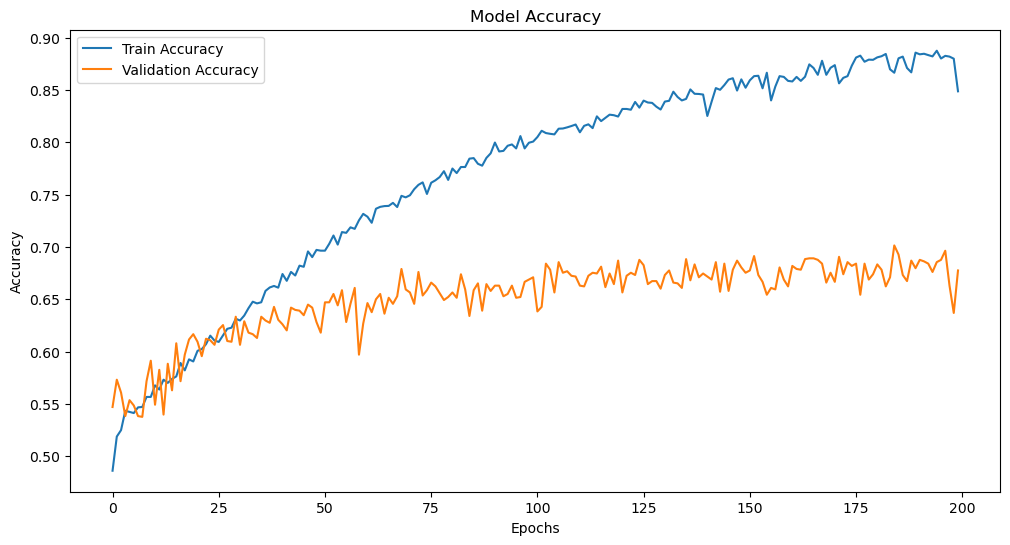

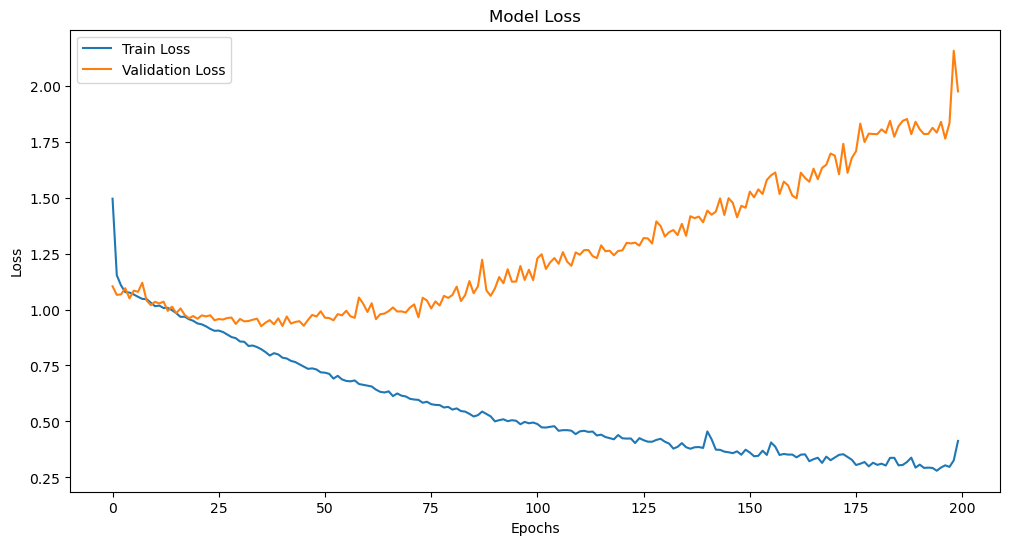

In [8]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


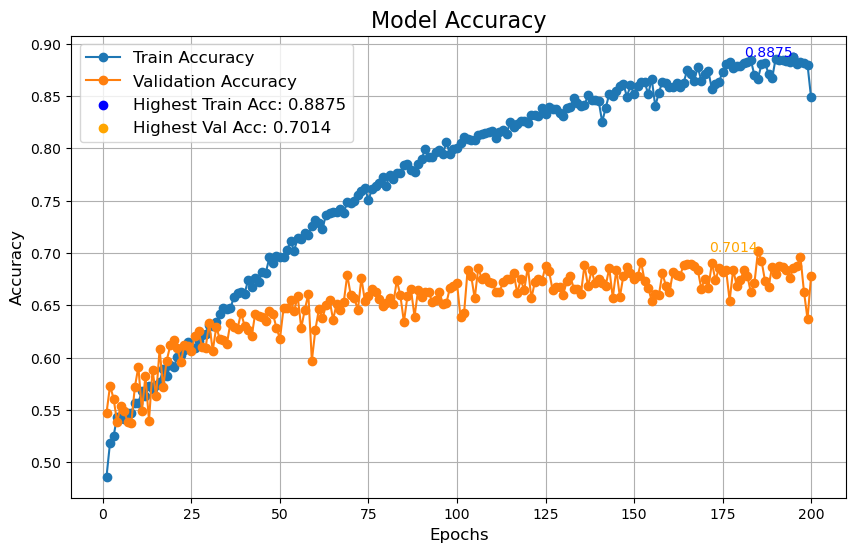

In [7]:
# Extracting accuracy and validation accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Finding the highest accuracies and corresponding epochs
max_train_acc = max(train_accuracy)
max_val_acc = max(val_accuracy)
max_train_epoch = train_accuracy.index(max_train_acc) + 1
max_val_epoch = val_accuracy.index(max_val_acc) + 1

# Plotting the accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')

# Marking the highest points
plt.scatter(max_train_epoch, max_train_acc, color='blue', label=f'Highest Train Acc: {max_train_acc:.4f}')
plt.scatter(max_val_epoch, max_val_acc, color='orange', label=f'Highest Val Acc: {max_val_acc:.4f}')

# Adding labels for the points
plt.text(max_train_epoch, max_train_acc, f'{max_train_acc:.4f}', ha='right', color='blue', fontsize=10)
plt.text(max_val_epoch, max_val_acc, f'{max_val_acc:.4f}', ha='right', color='orange', fontsize=10)

plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


# CNN with SMOTE 69%

In [10]:
from imblearn.over_sampling import SMOTE

# make the 3d back to 2d 

X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_2d, y_train)

# Reshaping for CNN model
X_train_res = X_train_res.reshape(-1, X_train_res.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

# Define the CNN model
model_smote = models.Sequential([
    layers.Conv1D(64, 3, activation='relu', input_shape=(X_train_res.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(128, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes: neither, crackle, wheeze, both
])

model_smote.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_smote.fit(X_train_res, y_train_res, epochs=200, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model_smote.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


Epoch 1/200


C:\Users\madir\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3293 - loss: 2.0097 - val_accuracy: 0.2804 - val_loss: 1.4896
Epoch 2/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4022 - loss: 1.2964 - val_accuracy: 0.4812 - val_loss: 1.1729
Epoch 3/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4522 - loss: 1.2201 - val_accuracy: 0.3565 - val_loss: 1.3824
Epoch 4/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4619 - loss: 1.1944 - val_accuracy: 0.3957 - val_loss: 1.3299
Epoch 5/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4974 - loss: 1.1492 - val_accuracy: 0.3746 - val_loss: 1.4402
Epoch 6/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5038 - loss: 1.1217 - val_accuracy: 0.4225 - val_loss: 1.2826
Epoch 7/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5374 - loss: 1.0690 - val_accuracy: 0.4964 - val_loss: 1.1585
Epoch 8/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5523 - loss: 1.0365 - val_accuracy: 0.5000

In [12]:
# Check the count of classes in y_train_res after SMOTE
pd.Series(y_train_res).value_counts()


2    2900
1    2900
3    2900
0    2900
Name: count, dtype: int64

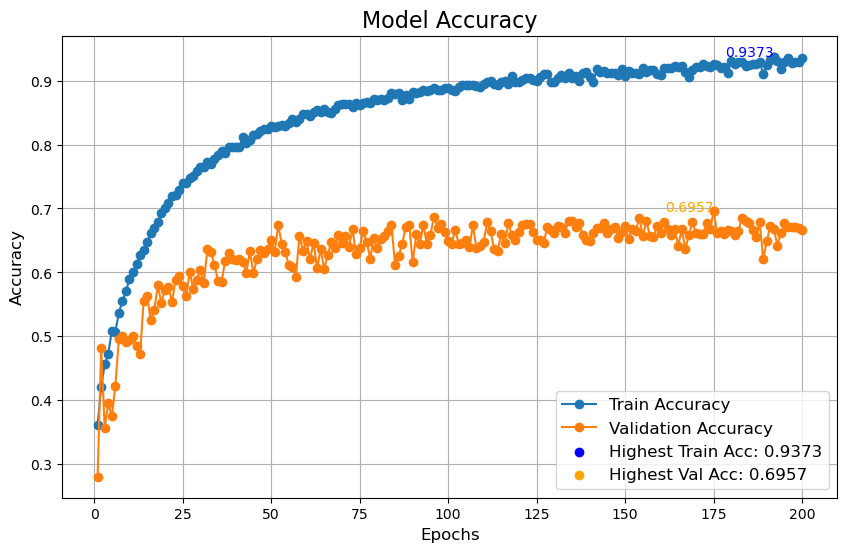

In [13]:
# Extracting accuracy and validation accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Finding the highest accuracies and corresponding epochs
max_train_acc = max(train_accuracy)
max_val_acc = max(val_accuracy)
max_train_epoch = train_accuracy.index(max_train_acc) + 1
max_val_epoch = val_accuracy.index(max_val_acc) + 1

# Plotting the accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')

# Marking the highest points
plt.scatter(max_train_epoch, max_train_acc, color='blue', label=f'Highest Train Acc: {max_train_acc:.4f}')
plt.scatter(max_val_epoch, max_val_acc, color='orange', label=f'Highest Val Acc: {max_val_acc:.4f}')

# Adding labels for the points
plt.text(max_train_epoch, max_train_acc, f'{max_train_acc:.4f}', ha='right', color='blue', fontsize=10)
plt.text(max_val_epoch, max_val_acc, f'{max_val_acc:.4f}', ha='right', color='orange', fontsize=10)

plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


# SVM 53%

In [26]:
# flattening data for SVM 
from sklearn.svm import SVC
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

X_train_flattened = scaler.fit_transform(X_train_flattened)
X_test_flattened = scaler.transform(X_test_flattened)

svm_model = SVC(kernel='linear', probability=True) 
svm_model.fit(X_train_flattened, y_train)

test_acc = svm_model.score(X_test_flattened, y_test)
print(f"Test accuracy (SVM): {test_acc}")

Test accuracy (SVM): 0.5376811594202898


# Random Forest 73%

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_flattened, y_train)

# Evaluate the model
test_acc = rf_model.score(X_test_flattened, y_test)
print(f"Test accuracy (Random Forest): {test_acc}")

Test accuracy (Random Forest): 0.7369565217391304


# KNN 73%

In [23]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_flattened = scaler.fit_transform(X_train_flattened)
X_test_flattened = scaler.transform(X_test_flattened)

knn_model = KNeighborsClassifier(n_neighbors=3)  
knn_model.fit(X_train_flattened, y_train)

# Evaluate the model
test_acc = knn_model.score(X_test_flattened, y_test)
print(f"Test accuracy (KNN): {test_acc}")

Test accuracy (KNN): 0.736231884057971


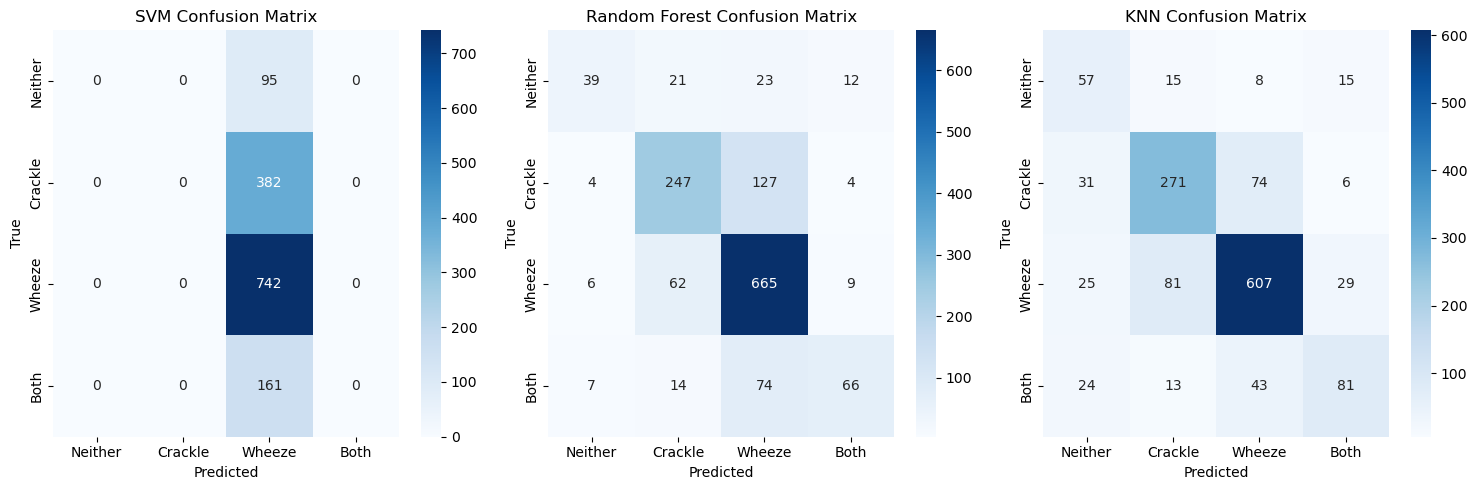

In [35]:
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

class_labels = ['Neither', 'Crackle', 'Wheeze', 'Both']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, ax=axs[0])
axs[0].set_title('SVM Confusion Matrix')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('True')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, ax=axs[1])
axs[1].set_title('Random Forest Confusion Matrix')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('True')

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, ax=axs[2])
axs[2].set_title('KNN Confusion Matrix')
axs[2].set_xlabel('Predicted')
axs[2].set_ylabel('True')

plt.tight_layout()
plt.show()


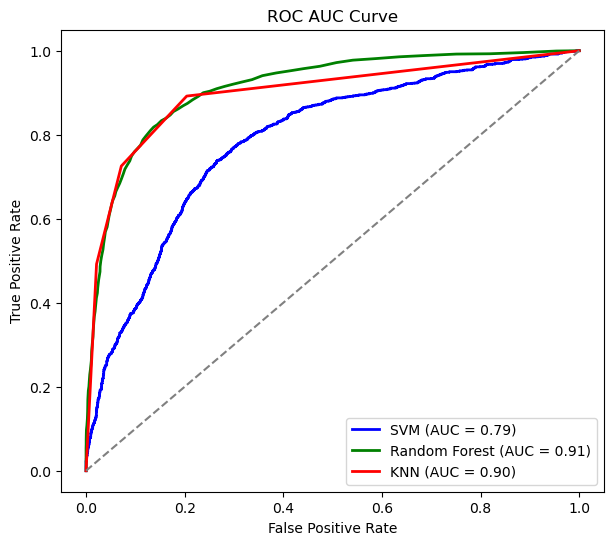

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

y_pred_svm = svm_model.predict_proba(X_test_flattened)
y_pred_rf = rf_model.predict_proba(X_test_flattened)
y_pred_knn = knn_model.predict_proba(X_test_flattened)

# Binarizer for multi-class ROC
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# ROC AUC Curves
fpr_svm, tpr_svm, _ = roc_curve(y_test_bin.ravel(), y_pred_svm.ravel())
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin.ravel(), y_pred_rf.ravel())
fpr_knn, tpr_knn, _ = roc_curve(y_test_bin.ravel(), y_pred_knn.ravel())

roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC AUC Curves
plt.figure(figsize=(7, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('ROC AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [1]:
# DAY 2 - Improvising the model accuracy using hyperparameter and optimization techniques

# Hyperparameter tuning Random Forest 74%

In [10]:
from sklearn.model_selection import GridSearchCV

 # RANDOM FOREST 
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best RF Parameters:", grid_rf.best_params_)
print("Best RF Accuracy on Training Set:", grid_rf.best_score_)

rf_best = grid_rf.best_estimator_
rf_test_accuracy = rf_best.score(X_test, y_test)
print("Random Forest Test Accuracy:", rf_test_accuracy)

Best RF Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best RF Accuracy on Training Set: 0.7209177539516733
Random Forest Test Accuracy: 0.744927536231884


# KNN 75%

In [12]:
# KNN 
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],               # extended search 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print("Best KNN Parameters:", grid_knn.best_params_)
print("Best KNN Accuracy on Training Set:", grid_knn.best_score_)

# Evaluate on test set
knn_best = grid_knn.best_estimator_
knn_test_accuracy = knn_best.score(X_test, y_test)
print("KNN Test Accuracy:", knn_test_accuracy)


Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best KNN Accuracy on Training Set: 0.7368643817257282
KNN Test Accuracy: 0.7536231884057971


# SVM 74%

In [11]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1]
}

svm = SVC(probability=True)
grid_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

print("Best SVM Parameters:", grid_svm.best_params_)
print("Best SVM Accuracy on Training Set:", grid_svm.best_score_)

svm_best = grid_svm.best_estimator_
svm_test_accuracy = svm_best.score(X_test, y_test)
print("SVM Test Accuracy:", svm_test_accuracy)


Best SVM Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best SVM Accuracy on Training Set: 0.7229113287871023
SVM Test Accuracy: 0.7427536231884058


In [14]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME']
}

grid_search = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_adaboost = grid_search.best_estimator_
test_acc = best_adaboost.score(X_test, y_test)
print("Best AdaBoost Test Accuracy:", test_acc)

Best AdaBoost Test Accuracy: 0.5420289855072464


# CNN optimization - 72%

C:\Users\madir\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.3176 - loss: 1.9221 - val_accuracy: 0.4833 - val_loss: 1.1537
Epoch 2/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4458 - loss: 1.3368 - val_accuracy: 0.5638 - val_loss: 1.0619
Epoch 3/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4844 - loss: 1.2125 - val_accuracy: 0.5862 - val_loss: 1.0107
Epoch 4/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5068 - loss: 1.1621 - val_accuracy: 0.6014 - val_loss: 0.9826
Epoch 5/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5275 - loss: 1.0987 - val_accuracy: 0.6014 - val_loss: 0.9773
Epoch 6/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5391 - loss: 1.0789 - val_accuracy: 0.6058 - val_loss: 0.9634
Epoch 7/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5539 - loss: 1.0641 - val_accuracy: 0.6145 - val_loss: 0.9606
Epoch 8/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5617 - loss: 1.0418 -

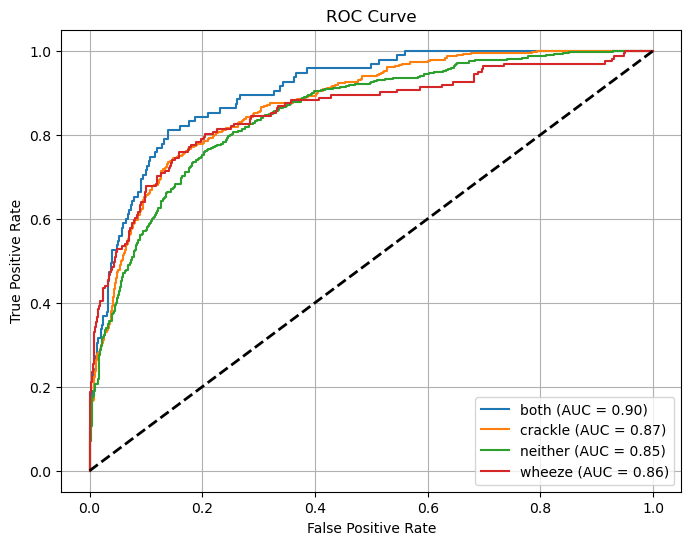

In [27]:
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

model = models.Sequential([
    layers.Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),  # Adjust pooling size to ensure valid dimensions
    layers.Dropout(0.25),
    
    layers.Conv1D(128, kernel_size=2, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),  # Adjusted pooling size
    layers.Dropout(0.25),
    
    layers.Conv1D(256, kernel_size=2, activation='relu'),
    layers.BatchNormalization(),
    layers.GlobalMaxPooling1D(),  # Replaces MaxPooling1D for small inputs
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 classes: neither, crackle, wheeze, both
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model (without EarlyStopping)
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {test_acc:.2f}')

# Predictions and Metrics
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Plot ROC Curves
y_test_bin = tf.keras.utils.to_categorical(y_test, num_classes=4)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
for i, label in enumerate(label_encoder.classes_):
    plt.plot(fpr[i], tpr[i], label=f'{label} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# K folds cross validation 68%

In [28]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

k = 5  # will experiment with 10 later 
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracies = []
losses = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Build the model
    model = Sequential([
        Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.25),
        Conv1D(128, kernel_size=2, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.25),
        Conv1D(256, kernel_size=2, activation='relu'),
        BatchNormalization(),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')  # For 4 classes
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model on the current fold
    history = model.fit(
        X_train_fold, y_train_fold,
        epochs=100,
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        verbose=0
    )

    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    accuracies.append(val_accuracy)
    losses.append(val_loss)

# Calculate the average accuracy and loss
avg_accuracy = np.mean(accuracies)
avg_loss = np.mean(losses)

print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Loss: {avg_loss:.4f}")


C:\Users\madir\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Average Accuracy: 0.6827
Average Loss: 1.0528


# Stacking Classifier 77%

In [33]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

best_svm = SVC(C=10, gamma=1, kernel='rbf')
best_knn = KNeighborsClassifier(metric='euclidean', n_neighbors=5, weights='distance')

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

estimators = [
    ('svm', best_svm),
    ('knn', best_knn)
]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=500))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

stacking_clf.fit(X_train_scaled, y_train)

y_pred_stack = stacking_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_pred_stack, y_test)
print(accuracy)
conf_matrix = confusion_matrix(y_pred_stack, y_test)
print(conf_matrix)

0.7760869565217391
[[ 52  12   9  11]
 [ 18 271  54  10]
 [ 13  93 657  49]
 [ 12   6  22  91]]


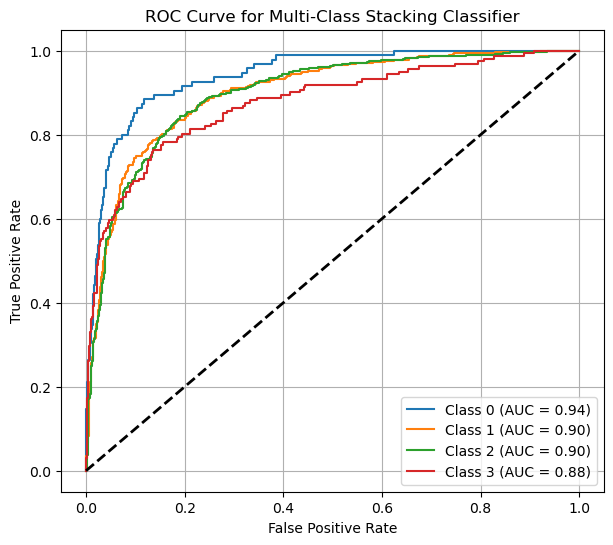

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # Adjust classes as per your label encoding
n_classes = y_test_bin.shape[1]

# Predict probabilities for each class
y_pred_proba = stacking_clf.predict_proba(X_test_scaled)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(7, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Stacking Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()
